# Introduction

In [43]:
# import libraries
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [44]:
# read dataset
df = pd.read_csv("/content/CreditCard/BankChurners.csv")

In [45]:
# inspect dataset
pd.set_option('max_columns', None)
# df.shape # (10127, 23)
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [46]:
# drop irrelevant data (last two rows and CLIENTNUM)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1, inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1, inplace=True)
df.drop('CLIENTNUM', axis=1, inplace=True)
df.shape

(10127, 20)

In [47]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [48]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [49]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Data Vizualization



Lets take a look at the histograms of all our data

In [50]:
# data vizualization with plotly

from plotly.subplots import make_subplots

fig = make_subplots(rows=5, cols=4)

trace0 = go.Histogram(x=df['Attrition_Flag'],name="Exsisiting Customer or not")
trace1 = go.Histogram(x=df['Customer_Age'], name='Age')
trace2 = go.Histogram(x=df['Gender'], name='Sex')
trace3 = go.Histogram(x=df['Dependent_count'], name='Dependent Count')
trace4 = go.Histogram(x=df['Education_Level'], name='Education Level')
trace5 = go.Histogram(x=df['Marital_Status'], name='Marital Status')
trace6 = go.Histogram(x=df['Card_Category'], name='Type of Card')
trace7 = go.Histogram(x=df['Months_on_book'], name='period of relationsip with book')
trace8 = go.Histogram(x=df['Total_Relationship_Count'], name='number of products held')
trace9 = go.Histogram(x=df['Months_Inactive_12_mon'], name='monthe incactive')
trace10 = go.Histogram(x=df['Contacts_Count_12_mon'], name='number of contacts')
trace11 = go.Histogram(x=df['Income_Category'], name='Income Category')
trace12 = go.Histogram(x=df['Credit_Limit'], name='Credit Limit')
trace13 = go.Histogram(x=df['Total_Revolving_Bal'], name='Revolving Balance')
trace14 = go.Histogram(x=df['Avg_Open_To_Buy'], name='Open to Buy Credit Line')
trace15 = go.Histogram(x=df['Total_Amt_Chng_Q4_Q1'], name='Change in Transaction Amount')
trace16 = go.Histogram(x=df['Total_Trans_Amt'], name='Transaction amount')
trace17 = go.Histogram(x=df['Total_Trans_Ct'], name='Transaction Count')
trace18 = go.Histogram(x=df['Total_Ct_Chng_Q4_Q1'], name='change in transaction count')
trace19 = go.Histogram(x=df['Avg_Utilization_Ratio'], name='Card Utilization Ratio')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 1, 4)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 2, 4)
fig.append_trace(trace8, 3, 1)
fig.append_trace(trace9, 3, 2)
fig.append_trace(trace10, 3, 3)
fig.append_trace(trace11, 3, 4)
fig.append_trace(trace12, 4, 1)
fig.append_trace(trace13, 4, 2)
fig.append_trace(trace14, 4, 3)
fig.append_trace(trace15, 4, 4)
fig.append_trace(trace16, 5, 1)
fig.append_trace(trace17, 5, 2)
fig.append_trace(trace18, 5, 3)
fig.append_trace(trace19, 5, 4)

fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)

fig.show()

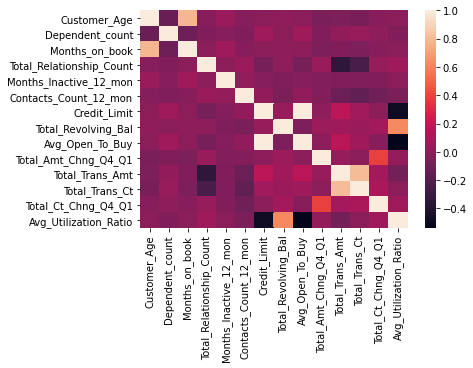

In [51]:
# correlation heatmap with seaborn
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)

# Checking Missing Values

In [52]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

There are no missing values that we need to modify.

# Feature Selection


*   change string columns to categorical values



In [54]:
# changing 'Attrition_Flag' and 'Gender' Into Binary
# make a copy of our data first 
cat_df = df.copy()

customer = {'Existing Customer': 1, 'Attrited Customer': 0} # create dictionary
cat_df['Attrition_Flag'] = [customer[i] for i in cat_df['Attrition_Flag']]


gender = {'M': 1, 'F': 0}  # dictionary
cat_df['Gender'] = [gender[i] for i in cat_df['Gender']]

In [63]:
# Now we One hot encode the other string columns with pd.getdummies
prep_df = pd.get_dummies(cat_df)
prep_df.head(10)

# And we get a dataframe with all integers

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,1,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,49,0,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,1,51,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,40,0,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
4,1,40,1,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
5,1,44,1,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
6,1,51,1,4,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
7,1,32,1,0,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
8,1,37,1,3,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9,1,48,1,2,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


# Modeling


In [65]:
# import Train test split library
from sklearn.model_selection import train_test_split

# seperate dependent and independent variables
X = prep_df.iloc[:, 1:].values
y = prep_df.iloc[:, 0].values

# Train test split our data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [74]:
# Import Classification libraries

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [76]:
xgb_clf = xgb.XGBClassifier(n_estimators = 100, random_state=42)
lr_clf = LogisticRegression()
RF_clf = RandomForestClassifier(n_estimators=100, random_state=42)
GB_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
SVC_clf = SVC(random_state=42)
gnb_clf = GaussianNB()
mlp_clf = MLPClassifier(random_state=42)


In [77]:
estimators = [xgb_clf, lr_clf, RF_clf, GB_clf, SVC_clf, gnb_clf, mlp_clf]
for e in estimators:
    e.fit(X_train, y_train)

In [97]:
# Training Accuracy
for e in estimators:
    print('{} - {:.1f}%'.format(e.__class__.__name__, e.score(X_train, y_train)*100))

XGBClassifier - 97.5%
LogisticRegression - 87.5%
RandomForestClassifier - 100.0%
GradientBoostingClassifier - 97.6%
SVC - 83.6%
GaussianNB - 89.5%
MLPClassifier - 86.7%


In [87]:
# Testing Accuracy
for e in estimators:
    print('{} - {:.1f}%'.format(e.__class__.__name__, e.score(X_test, y_test)*100))

XGBClassifier - 96.5%
LogisticRegression - 87.7%
RandomForestClassifier - 94.9%
GradientBoostingClassifier - 96.3%
SVC - 84.8%
GaussianNB - 90.0%
MLPClassifier - 86.8%


We can see here that our XGBClassifier performs better than all other classifiers.

In [98]:
# lets fine tune our variables for XGB classifier
# code is from https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=42 )

In [99]:
random_search.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   21.1s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7ff9aa08f678>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logi...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprec

In [101]:
print(random_search.best_params_)

{'subsample': 0.8, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6}


In [105]:
random_search.best_score_

0.9915936718207812